In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Final_Portfolio/Regression/CVS_Health.csv")
print(df.head())
print("Dataset Loaded Successfully")

         Date      Open      High       Low     Close  Adj Close  Volume
0  1973-02-22  1.656250  1.656250  1.656250  1.656250   1.656250   92800
1  1973-02-23  1.703125  1.703125  1.703125  1.703125   1.703125  400000
2  1973-02-26  1.671875  1.671875  1.671875  1.671875   1.671875  187200
3  1973-02-27  1.546875  1.546875  1.546875  1.546875   1.546875  657600
4  1973-02-28  1.656250  1.656250  1.656250  1.656250   1.656250  235200
Dataset Loaded Successfully


In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1973-02-22,1.656250,1.656250,1.656250,1.656250,1.656250,92800
1,1973-02-23,1.703125,1.703125,1.703125,1.703125,1.703125,400000
2,1973-02-26,1.671875,1.671875,1.671875,1.671875,1.671875,187200
3,1973-02-27,1.546875,1.546875,1.546875,1.546875,1.546875,657600
4,1973-02-28,1.656250,1.656250,1.656250,1.656250,1.656250,235200


In [31]:
print(f"The data set contains {df.shape[0]} rows")
print(f"The data set contains {df.shape[1]} columns")

The data set contains 12946 rows
The data set contains 7 columns


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12946 entries, 0 to 12945
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12946 non-null  object 
 1   Open       12946 non-null  float64
 2   High       12946 non-null  float64
 3   Low        12946 non-null  float64
 4   Close      12946 non-null  float64
 5   Adj Close  12946 non-null  float64
 6   Volume     12946 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 708.1+ KB


In [33]:
# Check Null value
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [34]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12946.000000,12946.000000,12946.000000,12946.000000,12946.000000,1.294600e+04
mean,27.922566,28.716048,28.126200,28.427880,28.427880,4.059984e+06
std,30.019487,29.830735,29.297969,29.566891,29.566891,5.141787e+06
min,0.000000,0.312500,0.296875,0.304688,0.304688,0.000000e+00
25%,6.125000,6.218750,6.062500,6.128906,6.128906,5.954000e+05
50%,14.125000,14.285625,13.880000,14.100000,14.100000,2.478100e+06
75%,40.257499,40.860000,39.794999,40.254999,40.254999,5.996525e+06
max,113.349998,113.650002,112.449997,113.449997,113.449997,1.851235e+08


In [35]:
df.duplicated().sum()


0

In [36]:
df['date'] = pd.to_datetime(df['Date'])

In [37]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'date'], dtype='object')

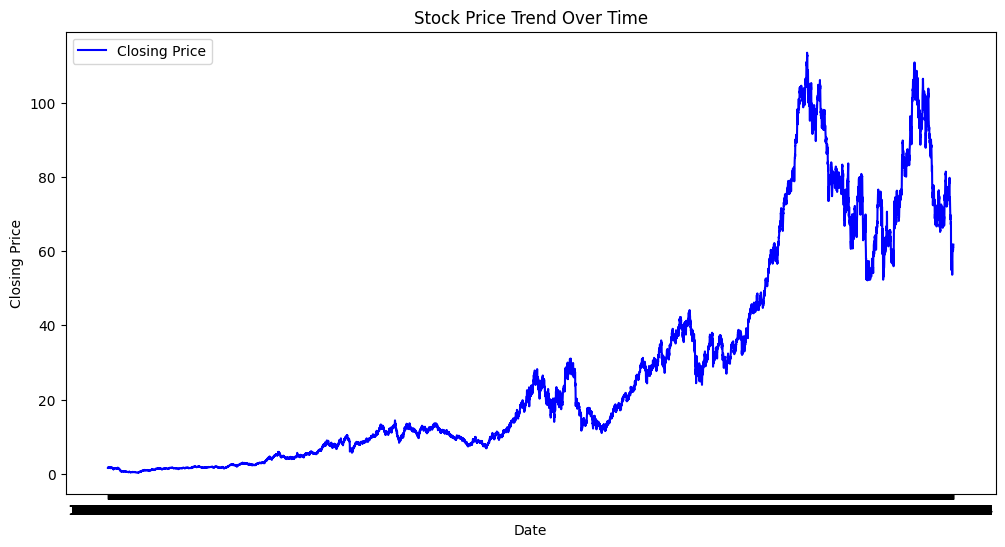

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trend Over Time')
plt.legend()
plt.show()


The stock has performed well over time but experienced high volatility.

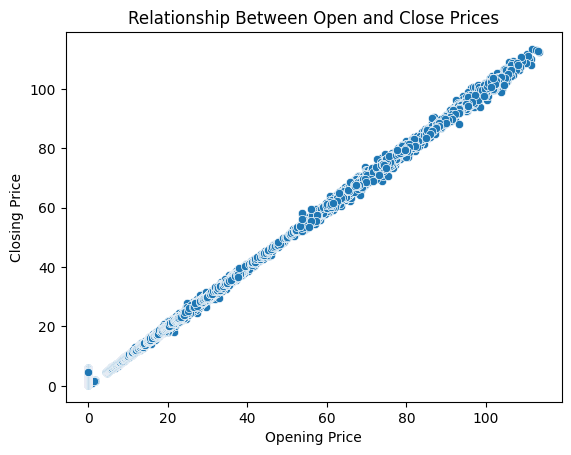

In [13]:
import seaborn as sns

sns.scatterplot(x=df['Open'], y=df['Close'])
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Relationship Between Open and Close Prices')
plt.show()


The points form a nearly perfect diagonal line, indicating a strong correlation between opening and closing prices.

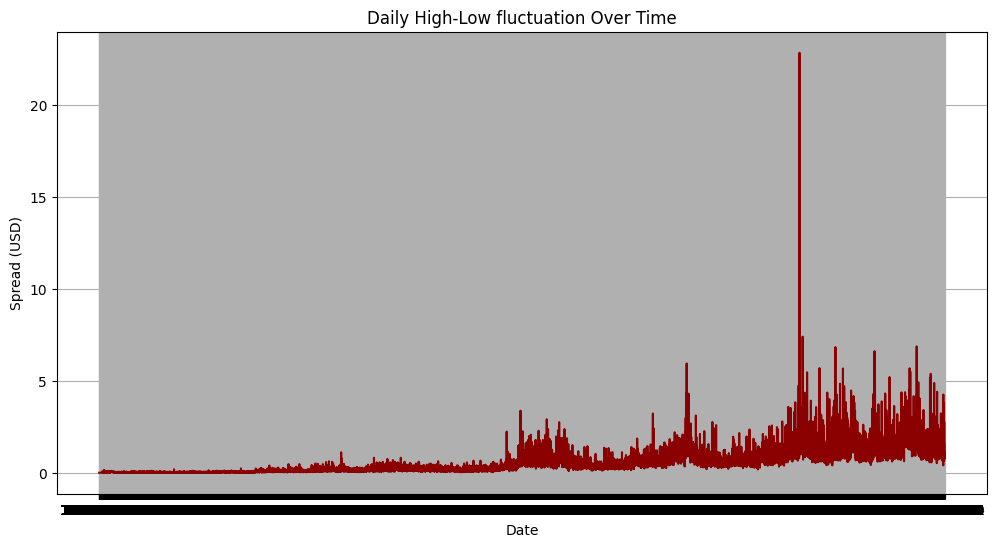

In [14]:
df['Daily Fluctuation'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Fluctuation'], color='darkred')
plt.title('Daily High-Low fluctuation Over Time')
plt.xlabel('Date')
plt.ylabel('Spread (USD)')
plt.grid(True)
plt.show()

he spread remained relatively low until the early 2000s.
Increased volatility is observed from 2008 onward, likely due to financial crises or market events.

In [ ]:
sns.regplot(x=df['Volume'], y=df['Close'])
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.title('Correlation Between Trading Volume and Stock Price')
plt.show()


The scatter plot shows a positive correlation between trading volume and stock price, with a trend line indicating that higher trading volumes are generally associated with higher stock prices.

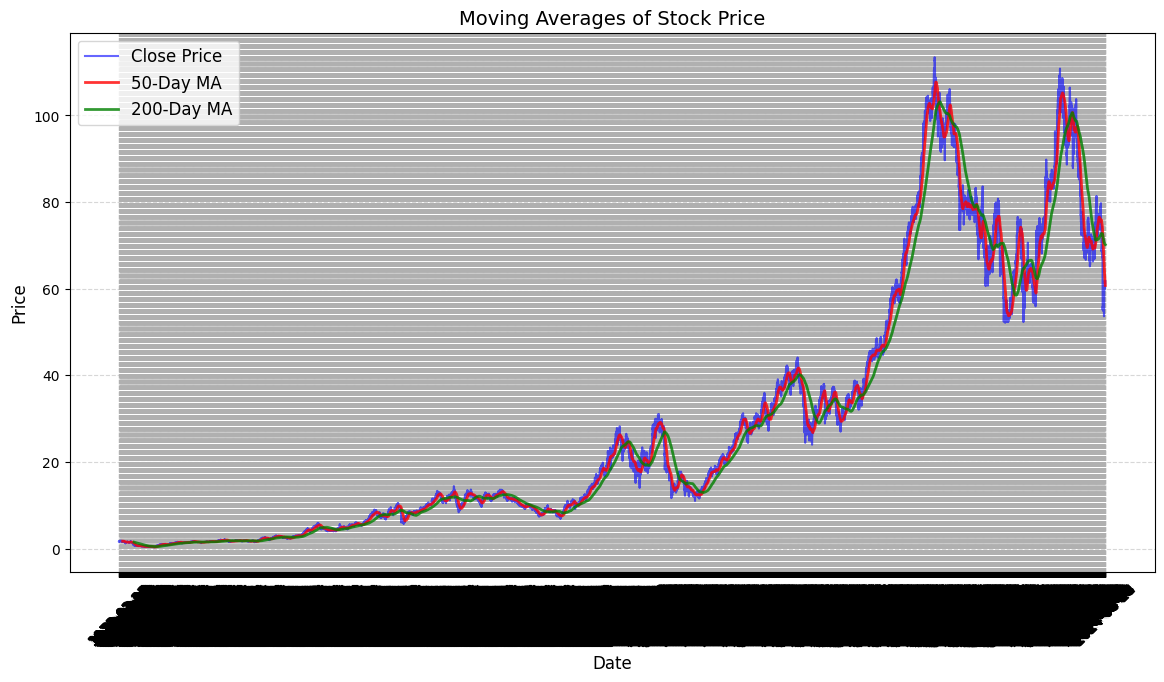

In [16]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

# Set figure size
plt.figure(figsize=(14, 7))

# Plot stock prices with smooth lines
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6, linewidth=1.5)
plt.plot(df['Date'], df['MA_50'], label='50-Day MA', color='red', alpha=0.8, linewidth=2)
plt.plot(df['Date'], df['MA_200'], label='200-Day MA', color='green', alpha=0.8, linewidth=2)

# Improve x-axis readability
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Moving Averages of Stock Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Improve legend
plt.legend(loc='upper left', fontsize=12)

# Reduce grid intensity for clarity
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

The plot shows the stock's closing price along with its 50-day and 200-day moving averages. The moving averages smooth out price fluctuations, with the 50-day MA (red) reacting faster to price changes, while the 200-day MA (green) lags more,

In [41]:


# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Year, Month, Day, and DayOfWeek
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

print(df.head())  # Verify the output


        Date      Open      High       Low     Close  Adj Close  Volume  \
0 1973-02-22  1.656250  1.656250  1.656250  1.656250   1.656250   92800   
1 1973-02-23  1.703125  1.703125  1.703125  1.703125   1.703125  400000   
2 1973-02-26  1.671875  1.671875  1.671875  1.671875   1.671875  187200   
3 1973-02-27  1.546875  1.546875  1.546875  1.546875   1.546875  657600   
4 1973-02-28  1.656250  1.656250  1.656250  1.656250   1.656250  235200   

        date  Year  Month  Day  DayOfWeek  
0 1973-02-22  1973      2   22          3  
1 1973-02-23  1973      2   23          4  
2 1973-02-26  1973      2   26          0  
3 1973-02-27  1973      2   27          1  
4 1973-02-28  1973      2   28          2  


In [42]:
features=['Open', 'High', 'Low', 'Volume', 'Close','Year', 'Month', 'Day', 'DayOfWeek']
df1=df[features]

In [43]:
df1.head()

,Open,High,Low,Volume,Close,Year,Month,Day,DayOfWeek
0,1.656250,1.656250,1.656250,92800,1.656250,1973,2,22,3
1,1.703125,1.703125,1.703125,400000,1.703125,1973,2,23,4
2,1.671875,1.671875,1.671875,187200,1.671875,1973,2,26,0
3,1.546875,1.546875,1.546875,657600,1.546875,1973,2,27,1
4,1.656250,1.656250,1.656250,235200,1.656250,1973,2,28,2


In [44]:
df1.dropna(inplace=True)

<ipython-input-44-e0e758ddcf8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [45]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
date,0
Year,0
Month,0


In [46]:
df1.head()

,Open,High,Low,Volume,Close,Year,Month,Day,DayOfWeek
0,1.656250,1.656250,1.656250,92800,1.656250,1973,2,22,3
1,1.703125,1.703125,1.703125,400000,1.703125,1973,2,23,4
2,1.671875,1.671875,1.671875,187200,1.671875,1973,2,26,0
3,1.546875,1.546875,1.546875,657600,1.546875,1973,2,27,1
4,1.656250,1.656250,1.656250,235200,1.656250,1973,2,28,2


In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [66]:
print(df_scaled.columns)  # Check available columns


Index(['Feature1', 'Feature2'], dtype='object')


In [59]:
print(df.columns)  # Check if 'Close' exists in df before scaling


Index(['Feature1', 'Feature2'], dtype='object')


In [67]:
print(df1.columns)  # Check if 'Close' was selected before scaling


Index(['Open', 'High', 'Low', 'Volume', 'Close', 'Year', 'Month', 'Day',
       'DayOfWeek'],
      dtype='object')


In [68]:
print(df.columns)  # Ensure 'Close' is in the original dataset


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [69]:
print([col for col in df.columns if 'close' in col.lower()])


['Close', 'Adj Close']


In [71]:
df.rename(columns=lambda x: x.strip(), inplace=True)


In [72]:
X = df_scaled.drop(columns=['Close'])
y = df_scaled['Close']


KeyError: "['Close'] not found in axis"

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

NameError: name 'X' is not defined

Primary Model

In [ ]:
class LinearRegression:
    def __init__(self,L=0.001,epochs=1000,m=0,c=0):
        self.L=L
        self.epochs=epochs
        self.m=None
        self.c=0
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.m=np.zeros(n_features)
        for _ in range(self.epochs):
            y_pred = np.dot(x, self.m) + self.c
            d_m = (-2/n_samples) * np.dot(x.T, (y - y_pred))
            d_c = (-2/n_samples) * np.sum(y - y_pred)
            self.m -= self.L * d_m
            self.c -= self.L * d_c
    def predict(self,x):
        return np.dot(x, self.m) + self.c

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)

In [ ]:
results_lr = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'R2': r2_score(y_test, y_pred_lr)
}

print("Result")
print(results_lr)

Result
{'MAE': 0.039833708824167646, 'RMSE': 0.04909404197314657, 'R2': 0.9975776328780276}


Build two model


In [ ]:
svr=SVR()
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)

In [ ]:
results_svr = {
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr)),
    'R2': r2_score(y_test, y_pred_svr)
}

print("Result")
print(results_svr)

Result
{'MAE': 0.03596213448073377, 'RMSE': 0.04361023102840661, 'R2': 0.9980885666509176}


In [ ]:
y_pred_svr_train=svr.predict(X_train)
results_svr_train = {
    'MAE': mean_absolute_error(y_train, y_pred_svr_train),
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_svr_train)),
    'R2': r2_score(y_train, y_pred_svr_train)
}

print("Result")
print(results_svr_train)

Result
{'MAE': 0.03659743137971701, 'RMSE': 0.04393646530229777, 'R2': 0.9980719206707239}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf=rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

In [ ]:
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'R2': r2_score(y_test, y_pred_rf)
}

print("Random Forest Result")
print(rf_results)

Random Forest Result
{'MAE': 0.0055270481115478375, 'RMSE': 0.009921190482017065, 'R2': 0.9999010741113808}


Hyperparameter tuning

In [ ]:
param_dist = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear']
}



random_search_svr = RandomizedSearchCV(estimator=svr,param_distributions=param_dist,  n_iter=30,cv=3, n_jobs=-1,verbose=2,random_state=42, scoring='neg_mean_squared_error')

random_search_svr.fit(X_train, y_train)
best_model_svr = random_search_svr.best_estimator_
print("Best parameters found: ", random_search_svr.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'kernel': 'linear', 'epsilon': 0.1, 'C': 10}


In [ ]:

best_model_svr.fit(X_train,y_train)
y_pred_svr_hp=best_model_svr.predict(X_test)
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_svr_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_svr_hp)),
    'R2': r2_score(y_test, y_pred_svr_hp)
}

print("Final Model Performance:")
print(rf_results)

Final Model Performance:
{'MAE': 0.012245384013072786, 'RMSE': 0.015958227921705682, 'R2': 0.9997440520171031}


Randomforest

In [ ]:
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt', 'log2']
}

random_search_rf = RandomizedSearchCV(estimator=rf,param_distributions=param_dist,n_iter=30, cv=3, n_jobs=-1,verbose=2,  random_state=42,scoring='neg_mean_squared_error')

# Fit the model with RandomizedSearchCV
random_search_rf.fit(X_train, y_train)
best_model_rf = random_search_rf.best_estimator_
print("Best parameters found: ", random_search_rf.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters found:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 160}


In [ ]:
best_model_rf.fit(X_train,y_train)
y_pred_rf_hp=best_model_rf.predict(X_test)
rf_results = {
    'MAE': mean_absolute_error(y_test, y_pred_rf_hp),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf_hp)),
    'R2': r2_score(y_test, y_pred_rf_hp)
}

print("Final Model Performance:")
print(rf_results)

Final Model Performance:
{'MAE': 0.005517658696222883, 'RMSE': 0.00997332195011421, 'R2': 0.9999000317564151}


Conclusion : Both the model SVR and Random forest give the accuracy of 99% in both trainig and testing data and even after parameter tuning we got te same result and the model performed very well in stock price data so there is no need of feature selection approach